In [1]:
from pycocotools.coco import COCO
import cv2
import json
import tqdm
import glob
import pylab
import random
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from sklearn.decomposition import PCA
from shapely.geometry.polygon import orient
from shapely.validation import explain_validity
from scipy.ndimage import binary_dilation, convolve
from matplotlib.patches import Polygon as MatplotlibPolygon

#from google.colab.patches import cv2_imshow
#from PIL import Image
pylab.rcParams['figure.figsize'] = (4.0, 6.0)

In [2]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip /content/annotations_trainval2017.zip

--2025-03-13 09:16:18--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 16.182.103.57, 52.216.9.59, 16.182.71.73, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|16.182.103.57|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  50.3MB/s    in 4.9s    

2025-03-13 09:16:23 (48.9 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  /content/annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [3]:
from pycocotools.coco import COCO

dataType='val2017' #train2017, val2017
dataDir='/content/'
annFile='{}annotations/instances_{}.json'.format(dataDir,dataType)
OBBannFile ='{}annotations/instancesOBB_{}.json'.format(dataDir,dataType)
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.77s)
creating index...
index created!


In [ ]:
!rm -r /content/COBB

rm: cannot remove '/content/COBB': No such file or directory


In [4]:
!git clone https://github.com/AHammoudeh/COBB.git

Cloning into 'COBB'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 70 (delta 34), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (70/70), 919.77 KiB | 3.95 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [ ]:
from COBB.StackAugV1 import visible_annotations_with_captions, remove_crowded, generate_overlayed_frames, overlay
from COBB.codesV1 import show_obbox, BB_criterion #get_OBB, annotation_items,annotation_2_category,

# Example usage for plotting multiple images horizontally
MethodsLists = {
    "rotating_calipers":[ "cat", "dog","bed"], #short_objects_captued_oriented,
    "PCA": [ "person", "bicycle", "motorcycle","train", "umbrella", "bird",] ,
    "regular": ["bus","traffic light","horse", "sheep", "cow", "elephant", "bear",
                "zebra", "giraffe", "chair", "couch","potted plant",  "clock","vase",
                "teddy bear","car","refrigerator","truck","microwave", "oven", "tv"], }

methods = list(MethodsLists.keys())

# with Copy Paste Augmentation

img_id_destination=422706


array([[[194, 192, 180],
        [194, 192, 180],
        [188, 186, 174],
        ...,
        [192, 209, 225],
        [194, 212, 226],
        [193, 211, 225]],

       [[192, 190, 178],
        [193, 191, 179],
        [187, 187, 175],
        ...,
        [193, 210, 226],
        [193, 210, 226],
        [192, 209, 225]],

       [[188, 188, 176],
        [189, 189, 177],
        [187, 187, 175],
        ...,
        [193, 210, 226],
        [193, 210, 226],
        [191, 208, 224]],

       ...,

       [[  1,   0,   5],
        [  1,   1,   3],
        [  1,   1,   3],
        ...,
        [ 44,  68, 114],
        [ 40,  65, 106],
        [ 38,  61, 102]],

       [[  1,   0,   5],
        [  1,   1,   3],
        [  1,   1,   3],
        ...,
        [ 34,  58, 104],
        [ 38,  61, 105],
        [ 36,  59, 101]],

       [[  0,   0,   4],
        [  1,   1,   3],
        [  1,   1,   3],
        ...,
        [ 36,  58, 107],
        [ 39,  61, 108],
        [ 29,  52,  96]]], dtype=uint8)
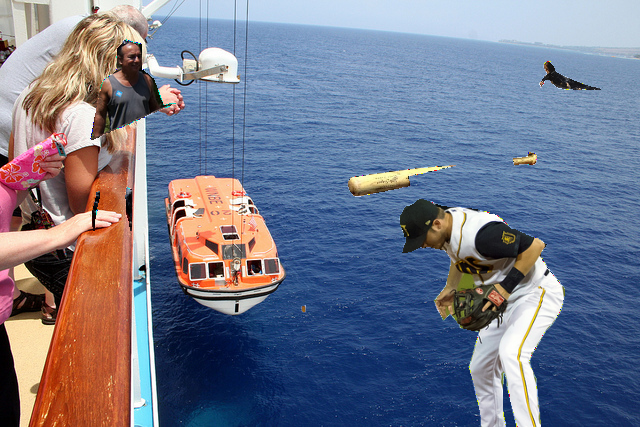

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      # Get Image destination
img_id_destination = coco.getImgIds()[random.randint(0, 5000)]  # Replace with your desired image ID
print(f'img_id_destination={img_id_destination}')
img_path=coco.loadImgs(img_id_destination)[0]['coco_url']
I_destination = io.imread(img_path)

N_source_images = 15
annotations = coco.loadAnns(coco.getAnnIds(imgIds=img_id_destination))
annotations_destination = remove_crowded(annotations)
Image_layers,Mask_layers, Added_annotations = generate_overlayed_frames(coco, I_destination,img_id_destination, N_source_images, margin_ratio=0.1, inContact_ratio_limit=0.1)
projected, All_annotations_after_pasteAug, Added_annotations_list, annotations_destination = overlay(coco, I_destination,annotations_destination,
                                                                                          Image_layers,Mask_layers, Added_annotations,
                                                                                          N_source_images)

projected.astype(np.uint8)
#coco.showAnns(All_annotations_after_pasteAug, draw_bbox=False)

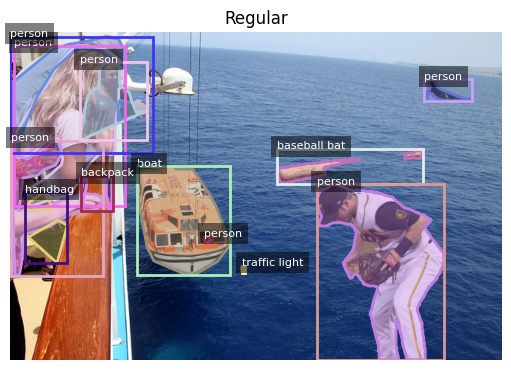

In [ ]:
# Example usage for plotting multiple images horizontally

annotations = visible_annotations_with_captions(All_annotations_after_pasteAug)
I_plot = projected.copy()

fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
anns = BB_criterion(annotations, coco)#, standard_method='regular', floating_objects=[],
                    #Standing_objects=[], objects_with_axis=[])
show_obbox(I_plot, anns, coco, title='Regular', with_segment=True, with_arrow=False,with_category=True, ax=ax)

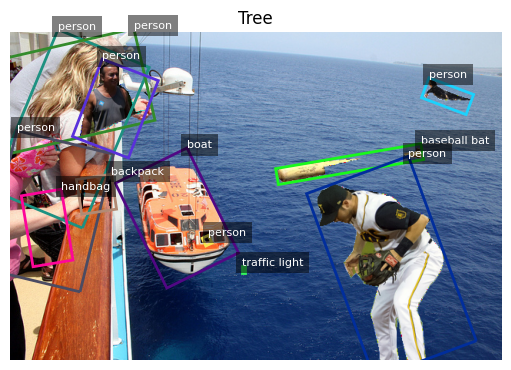

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
anns = BB_criterion(annotations, coco, standard_method= 'PCA',
                    floating_objects=MethodsLists['rotating_calipers'],
                    Standing_objects=MethodsLists['regular'], objects_with_axis=MethodsLists['PCA'])
show_obbox(I_plot, anns, coco, title='Tree', with_segment=False, with_arrow=False,with_category=True, ax=ax)

# OBB - No Augmentation

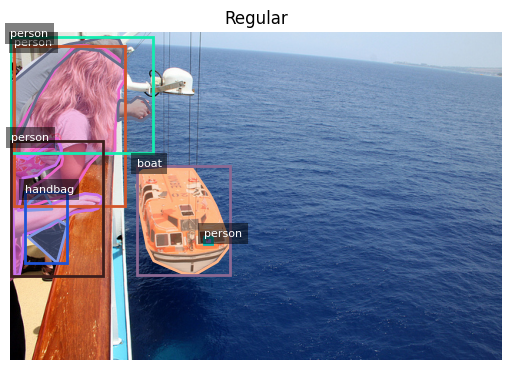

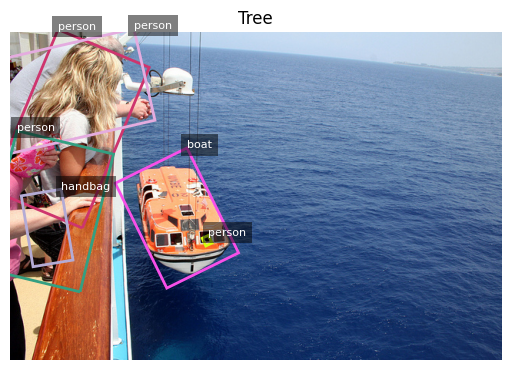

In [ ]:
# Example usage for plotting multiple images horizontally
select_random_img = False

if select_random_img:
  img_id = coco.getImgIds()[random.randint(0, 5000)]  # Replace with your desired image ID
else:
  img_id = img_id_destination
#print(f'img_id={img_id}')

img_path=coco.loadImgs(img_id)[0]['coco_url']
annotations = coco.loadAnns(coco.getAnnIds(imgIds=img_id))
I = io.imread(img_path)
I_plot = I.copy()

#----- show rectangular bounding boxes ------------------
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
anns = BB_criterion(annotations, coco)#, standard_method='regular', floating_objects=[],
                    #Standing_objects=[], objects_with_axis=[])
show_obbox(I_plot, anns, coco, title='Regular', with_segment=True, with_arrow=False,with_category=True, ax=ax)

#----- show oriented bounding boxes ------------------
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
anns = BB_criterion(annotations, coco, standard_method= 'PCA',
                    floating_objects=MethodsLists['rotating_calipers'],
                    Standing_objects=MethodsLists['regular'], objects_with_axis=MethodsLists['PCA'])
show_obbox(I_plot, anns, coco, title='Tree', with_segment=False, with_arrow=False,with_category=True, ax=ax)

# compare OBB methods

img_id=422706
['boat', 'person', 'person', 'person', 'person', 'handbag']


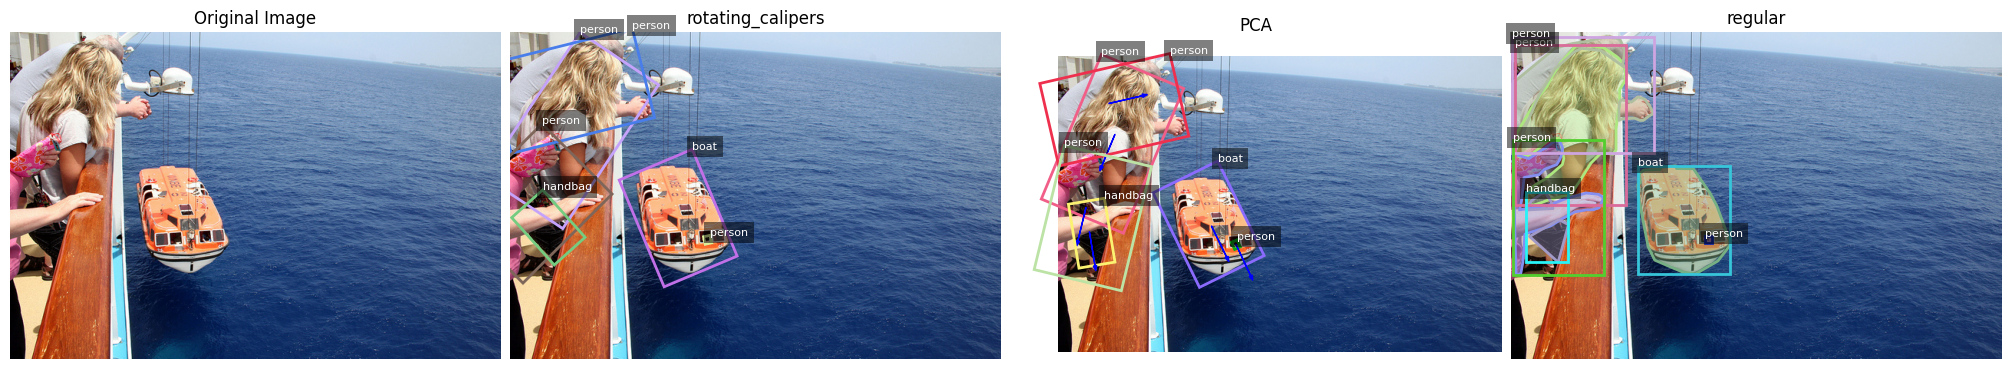

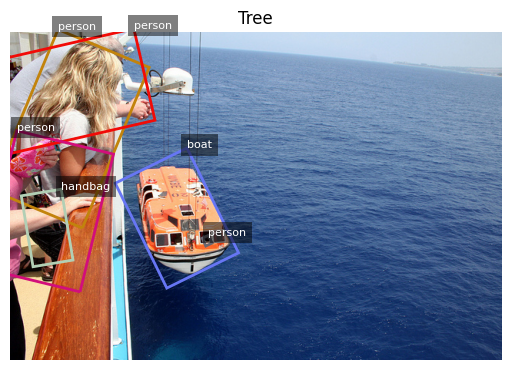

In [ ]:
from COBB.codesV1 import annotation_2_category

select_random_img = False

if select_random_img:
  img_id = coco.getImgIds()[random.randint(0, 5000)]  # Replace with your desired image ID
else:
  img_id = img_id_destination

print(f'img_id={img_id}')

img_path=coco.loadImgs(img_id)[0]['coco_url']
annotations = coco.loadAnns(coco.getAnnIds(imgIds=img_id))
I = io.imread(img_path)
I_plot = I.copy()

category =[]
for annotation in annotations:
    category.append(annotation_2_category(annotation, coco))
print(category)

fig, axes = plt.subplots(1, len(methods) + 1, figsize=(5 * (len(methods) + 1), 5), constrained_layout=True)
# Plot original image first
axes[0].imshow(I_plot)
axes[0].axis('off')
axes[0].set_title("Original Image")
for i, standard_method in enumerate(methods):
    anns = BB_criterion(annotations, coco, standard_method, floating_objects=[], Standing_objects=[], objects_with_axis=[])
    show_obbox(I_plot, anns, coco, title=standard_method,
               with_segment=standard_method == 'regular',
               with_arrow=(standard_method == 'PCA'),
               with_category=True, ax=axes[i + 1])

#plt.show()
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
anns = BB_criterion(annotations,coco, standard_method= 'PCA', floating_objects=MethodsLists['rotating_calipers'],
                    Standing_objects=MethodsLists['regular'], objects_with_axis=MethodsLists['PCA'])
show_obbox(I_plot, anns, coco, title='Tree', with_segment=False, with_arrow=False,with_category=True, ax=ax)
plt.show()

# References

## Functions

In [ ]:
def remove_crowded(annotations):
  annotations_after = []
  for ann in annotations:
    if ann['iscrowd'] == 0:
      annotations_after.append(ann)
  return annotations_after

def coco_bbox_to_coords(bbox):
    x_min, y_min, width, height = bbox
    x_max = x_min + width
    y_max = y_min + height
    return x_min, y_min, x_max, y_max

def Is_within_boundaries(ann, img_info, margin_ratio=0.1):
  img_height = img_info['height']
  img_width = img_info['width']
  x_min, y_min, x_max, y_max = coco_bbox_to_coords(ann['bbox'])
  c1 = x_min> (margin_ratio)*img_width
  c2 = y_min> (margin_ratio)*img_height
  c3 = x_max< (1-margin_ratio)*img_width
  c4 = y_max< (1-margin_ratio)*img_height
  within_bounaries = (c1 and c2) and (c3 and c4)
  return within_bounaries

def remove_beyond_boudaries(annotations,img_info, margin_ratio=0.1):
  annotations_after = []
  for ann in annotations:
    if Is_within_boundaries(ann, img_info, margin_ratio):
      annotations_after.append(ann)
  return annotations_after

def get_segmentation_mask(anns,img_info, coco):
    image_size = (img_info['height'],  img_info['width'])
    # Initialize an empty mask
    Full_mask = np.zeros(image_size, dtype=np.uint8)
    for ann in anns:
        if 'segmentation' in ann:
            # Convert segmentation to mask
            mask_1obj = coco.annToMask(ann)
            #hull, image_width, image_height, object_name, mask_1obj = annotation_items(ann, coco)
            Full_mask = Full_mask + mask_1obj  # Combine masks
    return Full_mask

def compute_inContact_ratio(object_mask, all_objects_mask):
    """
    Computes the overlap ratio of the perimeter of object1 with other objects.
    Parameters:
    - object_mask: 2D numpy array (binary) representing the single object mask.
    - all_objects_mask: 2D numpy array (binary) representing all objects in the scene.
    Returns:
    - Overlap ratio (float)
    """
    # Define a 3x3 structuring element for detecting the perimeter
    struct_elem = np.ones([7,7])
    # Compute the perimeter of object1
    dilated_object = binary_dilation(object_mask, structure=struct_elem)
    perimeter = dilated_object & ~object_mask
    # Compute the overlapping pixels by checking if perimeter pixels touch other objects
    inContact_pixels = perimeter & (all_objects_mask & ~object_mask)
    # Compute overlap ratio
    perimeter_count = np.sum(perimeter)
    inContact_count = np.sum(inContact_pixels)
    return inContact_count / perimeter_count if perimeter_count > 0 else 0

def remove_inContact(coco, annotations, Full_mask, inContact_ratio_limit = 0.15):
  annotations_cleaned = []
  for ann in annotations:
    if 'segmentation' in ann:
      object_mask = coco.annToMask(ann)
      inContact = compute_inContact_ratio(object_mask, Full_mask)
      ann['inContact'] = inContact
      if (inContact<inContact_ratio_limit) or (inContact>0.95):
        annotations_cleaned.append(ann)
  return annotations_cleaned

def apply_transformation(image,mask, angle=0, scale=1, tx=0, ty=0):
    height, width = image.shape[:2]
    # Compute the transformation matrix
    center = (width // 2, height // 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    M[0, 2] += tx
    M[1, 2] += ty
    # Apply transformation
    transformed_image = cv2.warpAffine(image, M, (width, height), borderMode=cv2.BORDER_CONSTANT, borderValue=0)
    transformed_mask = cv2.warpAffine(mask, M, (width, height), borderMode=cv2.BORDER_CONSTANT, borderValue=0)
    return transformed_image,transformed_mask, M

def compute_coco_bbox(mask):
    y_indices, x_indices = np.where(mask > 0)
    if len(x_indices) == 0 or len(y_indices) == 0:
        return None  # No object found after transformation
    x_min, x_max = x_indices.min(), x_indices.max()
    y_min, y_max = y_indices.min(), y_indices.max()
    return [int(x_min), int(y_min), int(x_max - x_min), int(y_max - y_min)]

def compute_VisibleArea(original_mask, transformed_mask, scale):
    original_pixels = np.sum(original_mask > 0)
    transformed_pixels = np.sum(transformed_mask > 0)
    if original_pixels == 0:
        return 0  # Avoid division by zero if the original mask has no object
    Area_loss = transformed_pixels/((scale**2)*original_pixels)
    return int(Area_loss*100)

def mask_to_coco_annotation(binary_mask):
    binary_mask = (binary_mask > 0).astype(np.uint8)
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    segmentation = []
    for contour in contours:
        contour = contour.flatten().tolist()
        if len(contour) > 4: # coco needs at least 3 points
            segmentation.append(contour)
    if not segmentation:
        return None # return none if no valid contour is found.
    x, y, w, h = cv2.boundingRect(binary_mask)
    bbox = [x, y, w, h]
    area = int(cv2.contourArea(contours[0])) #calculate area.
    return segmentation, bbox, area

def copy_paste_augmentation(coco, annotations_source_cleaned,I_source,I_destination, img_id_destination ):
  h0,w0,d0 = I_destination.shape
  Total_number_objects = len(annotations_source_cleaned)
  if Total_number_objects>0:
    selected_object = np.random.randint(Total_number_objects)
    ann_1obj = annotations_source_cleaned[selected_object]#random.choice(annotations_source_cleaned)
    mask_1obj = coco.annToMask(ann_1obj)
    Img_1obj = I_source * mask_1obj[:, :, np.newaxis]
    xmin, ymin, w, h = ann_1obj['bbox']
    if h>h0 or w>w0:
      #scale image and mask if the size of the object is larger than that of the
      Img_1obj = cv2.resize(Img_1obj, (w0//2, h0//2))
      mask_1obj = (np.sum(Img_1obj,axis=-1)>0).astype(np.uint8)
      xmin, ymin, w, h =compute_coco_bbox(mask_1obj)
    h = int(h)
    w = int(w)
    ymin_src = max(int(ymin), 0)
    xmin_scr = max(int(xmin),0)
    ymax_scr = ymin_src + h
    xmax_src = xmin_scr + w
    ymin_dist = max(int((h0-h)//2), 0)
    xmin_dist = max(int((w0-w)//2),0)
    ymax_dist = min(ymin_dist + h,h0)
    xmax_dist = min(xmin_dist + w, w0)
    # place object in the center
    Img_cenetred = np.zeros([h0,w0,3])#np.zeros_like(I_destination)
    Mask_cenetred = np.zeros([h0,w0])
    Img_cenetred[ymin_dist:ymax_dist, xmin_dist:xmax_dist, :] = Img_1obj[ymin_src:ymax_scr, xmin_scr:xmax_src,:].astype(np.uint8)
    Mask_cenetred[ymin_dist:ymax_dist, xmin_dist:xmax_dist] = mask_1obj[ymin_src:ymax_scr, xmin_scr:xmax_src]
    # Augment the image
    angle = 0#np.random.uniform(-20, 20)
    scale = np.random.uniform(0.4, 1.25)
    ty = np.random.uniform(-0.4, 0.4) * h0
    tx = np.random.uniform(-0.4, 0.4) * w0
    augmented_image,augmented_mask,M = apply_transformation(Img_cenetred,Mask_cenetred, angle, scale, tx, ty)
    # create new annotation
    visible_area_image = compute_VisibleArea(Mask_cenetred, augmented_mask, scale)
    #print(visible_area_image)
    segmentation, bbox, area = mask_to_coco_annotation(augmented_mask)
    New_annotation = {'segmentation':segmentation,
        'iscrowd':ann_1obj['iscrowd'],
        'image_id': img_id_destination, # the negative sign to distingush it from the origional image
        'category_id':ann_1obj['category_id'], 'id':ann_1obj['id'], #'inContact':ann_1obj['inContact'],
        'source_image_id':ann_1obj['image_id'], 'isAugmented':1,
        'area': area,'bbox': bbox,'Visible_due2_cut':visible_area_image, }
  else:
    print('No objects to augment')
  return augmented_image,augmented_mask, New_annotation

def calculate_visibility(Current_mask,Overlaying_mask):
    Current_mask = Current_mask>0
    Overlaying_mask = Overlaying_mask>0
    Overlap = np.multiply(Overlaying_mask, Current_mask)>0
    Visibility = 100*np.round(1 - (np.sum(Overlap)/np.sum(Current_mask)),2) if np.sum(Current_mask)>0 else 0
    return Visibility

def Check_bboxes_intersect(bbox1, bbox2):
    """
    Check if two COCO-format bounding boxes intersect.
    COCO bounding box format: [x, y, width, height]
    Args:
        bbox1 (list or tuple): [x1, y1, w1, h1] for the first bbox
        bbox2 (list or tuple): [x2, y2, w2, h2] for the second bbox
    Returns:
        bool: True if the bounding boxes intersect, False otherwise.
    """
    x1_min, y1_min, w1, h1 = bbox1
    x2_min, y2_min, w2, h2 = bbox2
    x1_max, y1_max = x1_min + w1, y1_min + h1
    x2_max, y2_max = x2_min + w2, y2_min + h2
    # Check if there is an overlap
    if x1_min < x2_max and x1_max > x2_min and y1_min < y2_max and y1_max > y2_min:
        return True
    return False

# Get N source images
def generate_overlayed_frames(coco, I_destination,img_id_destination, N_source_images=5, margin_ratio=0.05, inContact_ratio_limit=0.1 ):
  #(coco, annotations_source_cleaned,I_source,I_destination, img_id_destination )
  #N_source_images =5
  #margin_ratio=0.05,
  #inContact_ratio_limit=0.1
  h0,w0,d0 = I_destination.shape
  Img_id_sources = random.sample(coco.getImgIds(), N_source_images)
  Image_layers = np.zeros([N_source_images+1, h0,w0, d0])
  Mask_layers = np.zeros([N_source_images+1, h0, w0])
  Added_annotations ={}
  for i in range(N_source_images):
    # Get a source image
    #i = 0
    Img_id_source = Img_id_sources[i]
    img_info_source = coco.loadImgs(Img_id_source)[0]
    img_path_source = img_info_source['coco_url']
    I_source = io.imread(img_path_source)
    annotations_source = coco.loadAnns(coco.getAnnIds(imgIds=Img_id_source))
    # Filter the annotations: remove crowded objects
    annotations_source = remove_crowded(annotations_source)
    # Filter the annotations: remove objects in contact with other objects
    Full_mask = get_segmentation_mask(annotations_source,img_info_source, coco)
    annotations_source_cleaned1 = remove_inContact(coco, annotations_source, Full_mask, inContact_ratio_limit)
    # Filter the annotations: remove objects beyond boundaries
    annotations_source_cleaned = remove_beyond_boudaries(annotations_source_cleaned1,img_info_source, margin_ratio)
    # Augment the selected object
    if len(annotations_source_cleaned)> 0:
      augmented_image,augmented_mask, New_annotation = copy_paste_augmentation(coco,annotations_source_cleaned,I_source,I_destination,img_id_destination )
      Image_layers[i] = augmented_image
      Mask_layers[i] = augmented_mask.astype(np.uint8)
      New_annotation['Layer']=i #This is to indicate the closeness of the object to the camera [bigger N -> closer to camera: overlayed above other objects]
      Added_annotations[i]= New_annotation
    else:
      Added_annotations[i]= {}
      #print(f'Caution:no enough objects in source image {i}')
  return Image_layers,Mask_layers, Added_annotations

#annotations_source_cleaned1 = remove_overlapped(annotations_source, Full_mask, overlap_ratio_limit = 0.1)
#print(len(Added_annotations))
#print(Image_layers,Mask_layers, New_annotation )

def overlay(coco, I_destination,annotations_destination, Image_layers,Mask_layers, Added_annotations, N_source_images=5 ):
  # Overlay images and calculate the visibility of new objects
  projected = I_destination.astype(np.uint8).copy()  # Initialize with zeros
  Image_layers.astype('float64')
  Visibility={}
  for j in range(N_source_images):
      projected[Mask_layers[j] > 0] = 0  # Zero out pixels where the new object will be placed
      projected = np.add(projected, Image_layers[j])  # Place the new object
      projected = projected.astype(np.uint8)
      Overlaying_mask = np.sum(Mask_layers[j+1:],axis=0)
      Added_annotations[j]['Layer'] = j
      Visibility[j] = calculate_visibility(Current_mask=Mask_layers[j], Overlaying_mask = Overlaying_mask)
      Added_annotations[j]['Visible_due2_overlay'] = min(Visibility[j], 100)
      if 'Visible_due2_cut' in Added_annotations[j].keys():
        Added_annotations[j]['Visible'] = Visibility[j]*Added_annotations[j]['Visible_due2_cut']/100
      else:
        Added_annotations[j]['Visible'] = Visibility[j]
      #print(Visibility[j])

  #measure the visbility of the objects in the destination image due to projections
  Overlaying_mask_of_added_objects = (np.sum(Mask_layers,axis=0)>0).astype(np.uint8)
  for dest_ann in annotations_destination:
    dest_1obj_mask = coco.annToMask(dest_ann)#get_segmentation_mask(anns,img_info, coco)
    Visibility = calculate_visibility(dest_1obj_mask, Overlaying_mask = Overlaying_mask_of_added_objects)
    dest_ann['Visible_due2_overlay']=min(Visibility,100)
    dest_ann['Layer']=0

  # Merge annotations
  Added_annotations_list = list(Added_annotations.values())
  Added_annotations_list
  All_annotations_after_pasteAug = annotations_destination+Added_annotations_list

  #print('number of origional objects:',len(annotations_destination))
  #print('number of pasted objects:',len(Added_annotations_list))
  #print('number of all objects:',len(All_annotations_after_pasteAug))
  return projected, All_annotations_after_pasteAug, Added_annotations_list, annotations_destination


def visible_annotations_with_captions(annotations):
  visible_annotations=[]
  for ann in annotations:
    if 'category_id' in ann:
      if 'Visible_due2_overlay' in ann:
        if ann['Visible_due2_overlay']>1:
          visible_annotations.append(ann)
  return visible_annotations

In [ ]:
# Function to calculate rotated rectangles using rotating calipers
def rotating_calipers_rectangles(hull):
    rectangles = []
    hull_points = hull[:, 0, :]
    n = len(hull_points)
    max_length = 0
    for i in range(n):
        # Get the edge formed by two consecutive points
        p1 = hull_points[i]
        p2 = hull_points[(i + 1) % n]
        # Compute the edge vector and angle of rotation
        edge_vector = p2 - p1
        edge_length = np.linalg.norm(edge_vector)
        edge_angle = np.arctan2(edge_vector[1], edge_vector[0])
        # Rotate the hull points to align the edge with the x-axis
        rotation_matrix = np.array([[-np.cos(edge_angle), np.sin(edge_angle)],
                                     [-np.sin(edge_angle),  -np.cos(edge_angle)]])
        rotated_points = np.dot(hull_points - p1, rotation_matrix.T)
        # Get the bounding box of the rotated points
        x_min, y_min = np.min(rotated_points, axis=0)
        x_max, y_max = np.max(rotated_points, axis=0)
        # Calculate the rectangle corners in the original coordinate system
        rectangle = np.array([
            [x_min, y_min],
            [x_max, y_min],
            [x_max, y_max],
            [x_min, y_max]
        ])
        rectangle = np.dot(rectangle, rotation_matrix) + p1
        rectangles.append(rectangle)
        if edge_length>max_length:
          max_length = edge_length
          rect_aligned_with_maxEdge = rectangle
    return rectangles, rect_aligned_with_maxEdge

def intersection_area(rect1: np.ndarray, rect2: np.ndarray, plot=False) -> float:
    """
    Calculate the intersection area of two rectangles (possibly rotated).
    :param rect1: numpy array of shape (4, 2) representing the first rectangle
    :param rect2: numpy array of shape (4, 2) representing the second rectangle
    :return: The intersection area (float). Returns 0 if no intersection.
    """
    def validate_polygon(coords):
        """Validates and fixes a polygon if necessary."""
        polygon = Polygon(coords)
        if not polygon.is_valid:
            print(f"Invalid polygon: {explain_validity(polygon)}")
            # Attempt to fix self-intersection by using the convex hull
            polygon = polygon.convex_hull
            print(f"Polygon fixed using convex hull: {polygon.wkt}")
        # Ensure the polygon is oriented counterclockwise
        return orient(polygon, sign=1.0)
    # Validate and fix input polygons
    poly1 = validate_polygon(rect1)
    poly2 = validate_polygon(rect2)
    # Find the intersection of the two polygons
    intersection = poly1.intersection(poly2)
    # Plotting
    if plot:
        fig, ax = plt.subplots(figsize=(3,3))
        # Add rectangles
        rect_patch1 = MatplotlibPolygon(np.array(poly1.exterior.coords), closed=True, edgecolor='blue', facecolor='blue', alpha=0.4)#, label="p1")
        rect_patch2 = MatplotlibPolygon(np.array(poly2.exterior.coords), closed=True, edgecolor='green', facecolor='green', alpha=0.4)#, label="p2")
        ax.add_patch(rect_patch1)
        ax.add_patch(rect_patch2)
        # Add intersection if it exists
        '''if not intersection.is_empty and isinstance(intersection, ShapelyPolygon):
            x, y = intersection.exterior.xy
            ax.fill(x, y, color='red', alpha=0.5, label="Intersection")'''
        # Adjust plot limits
        all_points = np.vstack((rect1, rect2))
        x_min, y_min = all_points.min(axis=0)
        x_max, y_max = all_points.max(axis=0)
        ax.set_xlim(x_min - 1, x_max + 1)
        ax.set_ylim(y_min - 1, y_max + 1)
        ax.set_aspect('equal', adjustable='box')
        # Add legend and labels
        ax.legend()
        #ax.set_title("Rectangle Intersection")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        plt.grid(True)
        plt.show()
    # Calculate the area of the intersection
    if intersection.is_empty:
        return 0.0  # No intersection
    return intersection.area

def rle_to_mask(rle):
    """
    Converts Run-Length Encoding (RLE) to a binary segmentation mask.
    Args:
        rle (dict): A dictionary containing:
            - 'counts': The RLE as a list or string (COCO format).
            - 'size': A list or tuple with the dimensions [height, width].
        shape (tuple): The shape of the mask (height, width).
    Returns:
        np.ndarray: A binary mask of the given shape (height, width).
    """
    # Extract RLE counts and mask size
    counts = rle['counts']
    height, width = rle['size']
    # If counts are in string format, split and convert to integers
    if isinstance(counts, str):
        counts = list(map(int, counts.split()))
    # Flatten the RLE counts into a binary array
    mask = np.zeros(height * width, dtype=np.uint8)
    start = 0  # Start position in the flattened mask
    for i, length in enumerate(counts):
        if i % 2 == 1:  # Foreground (object) pixels
            mask[start:start + length] = 1
        # Move the starting point forward
        start += length
    # Reshape the flat mask into the specified 2D shape
    return mask.reshape((width, height))

def find_main_axis(mask):
    # Get the coordinates of the object (where mask == 1)
    y, x = np.where(mask == 1)
    points = np.column_stack((x, y))
    # Perform PCA
    pca = PCA(n_components=2)
    pca.fit(points)
    # Principal axis (first component)
    center = np.mean(points, axis=0)
    direction = pca.components_[0]
    return center, direction

def oriented_bbox(mask, direction_vector, center):
    rectangles = []
    hull_points = np.column_stack(np.where(mask > 0))#hull[:, 0, :]
    angle = np.arctan(direction_vector[1]/(direction_vector[0]+0.00000001))
    # Rotate the hull points to align the edge with the x-axis
    rotation_matrix = np.array([[-np.cos(angle), np.sin(angle)],
                                  [-np.sin(angle),  -np.cos(angle)]])
    rotated_points = np.dot(hull_points - center, rotation_matrix.T)
    # Get the bounding box of the rotated points
    x_min, y_min = np.min(rotated_points, axis=0)
    x_max, y_max = np.max(rotated_points, axis=0)
    # Calculate the rectangle corners in the original coordinate system
    rectangle = np.array([
        [x_min, y_min],
        [x_max, y_min],
        [x_max, y_max],
        [x_min, y_max]
    ])
    rectangle = np.dot(rectangle, rotation_matrix) + center
    return rectangle


def annotation_2_category(annotation, coco):
  category_id = annotation['category_id']
  categories = coco.loadCats(category_id)
  if categories:
      return categories[0]['name']  # Return the name of the category
  else:
      return "NA"

def annotation_items(annotation, coco):
  image_id = annotation['image_id']
  image_info = coco.loadImgs(image_id)[0]
  image_height = image_info['height']
  image_width = image_info['width']
  object_name = annotation_2_category(annotation, coco)
  segmnt = annotation['segmentation']
  if annotation['iscrowd']== 0:
    polygons_lists = segmnt
    flattened_list = [item for sublist in polygons_lists for item in sublist]
    hull = np.array(flattened_list).reshape([-1,1,2])
    #hull = cv2.convexHull(hull.astype(np.int32))
    mask = np.zeros([image_height, image_width])
    cv2.fillPoly(mask, [hull.astype(np.int32)],1)
    mask = mask.T
  else:
    mask = rle_to_mask(segmnt)
    # Find all non-zero points in the mask
    segmented_points = np.column_stack(np.where(mask > 0))
    if len(segmented_points) == 0:
        raise ValueError("No object found in the segmentation mask.")
    # Compute the convex hull of all points
    hull = cv2.convexHull(segmented_points)
    #mask = mask
  return hull, image_width, image_height, object_name, mask

def get_OBB(annotation, coco, method='regular', plot=False):
  #method = ['regular', 'PCA', 'rotating_calipers','logest_edge']
  #flattened_list = [item for sublist in polygons_lists for item in sublist]
  #hull = np.array(flattened_list).reshape([-1,1,2])
  hull, image_width, image_height, object_name, mask = annotation_items(annotation, coco)
  rectangles, rect_aligned_with_maxEdge = rotating_calipers_rectangles(hull)

  if  method == 'rotating_calipers':
    image_rectangle = np.array([[0,0],[image_width,0],[image_width, image_height],[0,image_height]])
    #image_rectangle = np.array([[0,0],[image_height,0],[image_height, image_width],[0,image_width]])
    min_area = np.inf
    for i, rect in enumerate(rectangles):
      area = intersection_area(image_rectangle, rect,plot=plot)
      if area<min_area:
        min_area = area
        selected_box = rect
  elif  method == 'regular':
    x_min, y_min, width, height = annotation['bbox']
    x_max, y_max = x_min + width, y_min + height
    selected_box = np.array([[x_min, y_min],
                              [x_max, y_min],
                              [x_max, y_max],
                              [x_min, y_max]])
  elif  method == 'logest_edge':
    selected_box = rect_aligned_with_maxEdge
  elif method == 'PCA':
    center, direction = find_main_axis(mask)
    selected_box = oriented_bbox(mask, direction, center)
    annotation['center']= center
    annotation['direction']= direction
  return selected_box


def BB_criterion(annotations, coco, standard_method='regular',
            floating_objects=[], Standing_objects=[],objects_with_axis=[]):
  #All_objects = floating_objects+Standing_objects+objects_with_axis
  if standard_method != 'None':
    for annotation in annotations:
      category = annotation_2_category(annotation, coco)
      #print(category)
      #method = ['None', 'regular', 'PCA', 'rotating_calipers','logest_edge']
      if category in Standing_objects:
        method = 'regular'#'regular'
      elif category in objects_with_axis:
        method = 'PCA'
      elif category in floating_objects:
        method = 'rotating_calipers'#'rotating_calipers'
      else:
        method = standard_method
      selected_box=get_OBB(annotation, coco, method=method)
      annotation['obbox'] = list(np.round(selected_box,1).reshape(-1))
  return annotations

def show_obbox(I_plot, annotations, coco, title, with_segment=False, with_arrow=True, with_category=True, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.imshow(I_plot)
    ax.axis('off')
    ax.set_title(title)
    if with_segment:
        plt.sca(ax)  # Set the current axis to the provided subplot axis
        coco.showAnns(annotations, draw_bbox=False)
    for annotation in annotations:
        coords = annotation['obbox']
        polygon_coords = [(coords[i], coords[i + 1]) for i in range(0, len(coords), 2)]
        mpl_patch = MatplotlibPolygon(polygon_coords, closed=True,
                                      edgecolor=[random.random() for _ in range(3)],
                                      facecolor="none", linewidth=2)
        ax.add_patch(mpl_patch)
        if with_arrow and 'center' in annotation:
            center = annotation['center']
            direction = annotation['direction']
            ax.arrow(center[1], center[0], direction[1]*50, direction[0]*50,
                     color='blue', head_width=5)
        if with_category:
            category_name = annotation_2_category(annotation, coco)
            bbox_x, bbox_y = min(polygon_coords, key=lambda point: point[1])#np.max(polygon_coords, axis=0)  # Use first coordinate as reference
            ax.text(bbox_x, bbox_y, category_name, color='white', fontsize=8,
                    bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))

## Load Local Coco

In [ ]:
#download samples from coco dataset
!gdown 1KwX27zzqCWeBgMFl4WbaSnn3IW_UNWoV
!unzip coco.zip -d coco/

In [ ]:
#download samples from coco dataset
!gdown 1KwX27zzqCWeBgMFl4WbaSnn3IW_UNWoV
!unzip coco.zip -d coco/

dataDir='/content/coco/'
dataType='val2017'
annFile='{}annotations/instances_{}.json'.format(dataDir,dataType)

# initialize COCO api for instance annotations
from pycocotools.coco import COCO
coco=COCO(annFile)

imgs_folder = '{}images/{}/'.format(dataDir,dataType)
image_links = glob.glob(imgs_folder+'*.jpg')
print('Number of images:',len(image_links))